In [77]:
!pip install xgboost

In [85]:
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, precision_score, recall_score, classification_report, accuracy_score, f1_score, confusion_matrix

from scipy import stats
import pandas as pd
import seaborn as sns
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# Generate dataset using make_classification function in the sklearn. 
# Convert it into pandas dataframe.
x, y = make_classification(n_samples=10000, n_features=8, n_informative=5, class_sep=2, random_state=42)

df = pd.DataFrame(x,y)
df.head()

,0,1,2,3,4,5,6,7
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611
0,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524
0,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934
0,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 0
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
 5   5       10000 non-null  float64
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
dtypes: float64(8)
memory usage: 703.1 KB


In [32]:
df.describe()

,0,1,2,3,4,5,6,7
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-1.004918,0.982548,0.003020,1.071892,0.995967,-1.869138,-0.001747,0.994744
std,2.125161,2.236374,1.016612,2.571314,2.161592,2.587044,2.446634,2.266276
min,-7.361942,-6.334871,-3.531879,-6.507147,-6.124101,-10.552410,-8.263252,-6.274545
25%,-2.575438,-0.418504,-0.673464,-1.196634,-0.507065,-3.750591,-1.984409,-0.594088
50%,-1.448219,1.414705,0.013764,1.182811,1.478394,-1.769049,0.215688,1.373192
75%,0.666344,2.548942,0.680873,3.296581,2.529939,0.072616,1.985890,2.617999
max,6.445003,7.784181,3.443926,8.484377,7.824402,5.853682,6.944183,7.815690


In [33]:
# Check duplicate values and missing data.
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

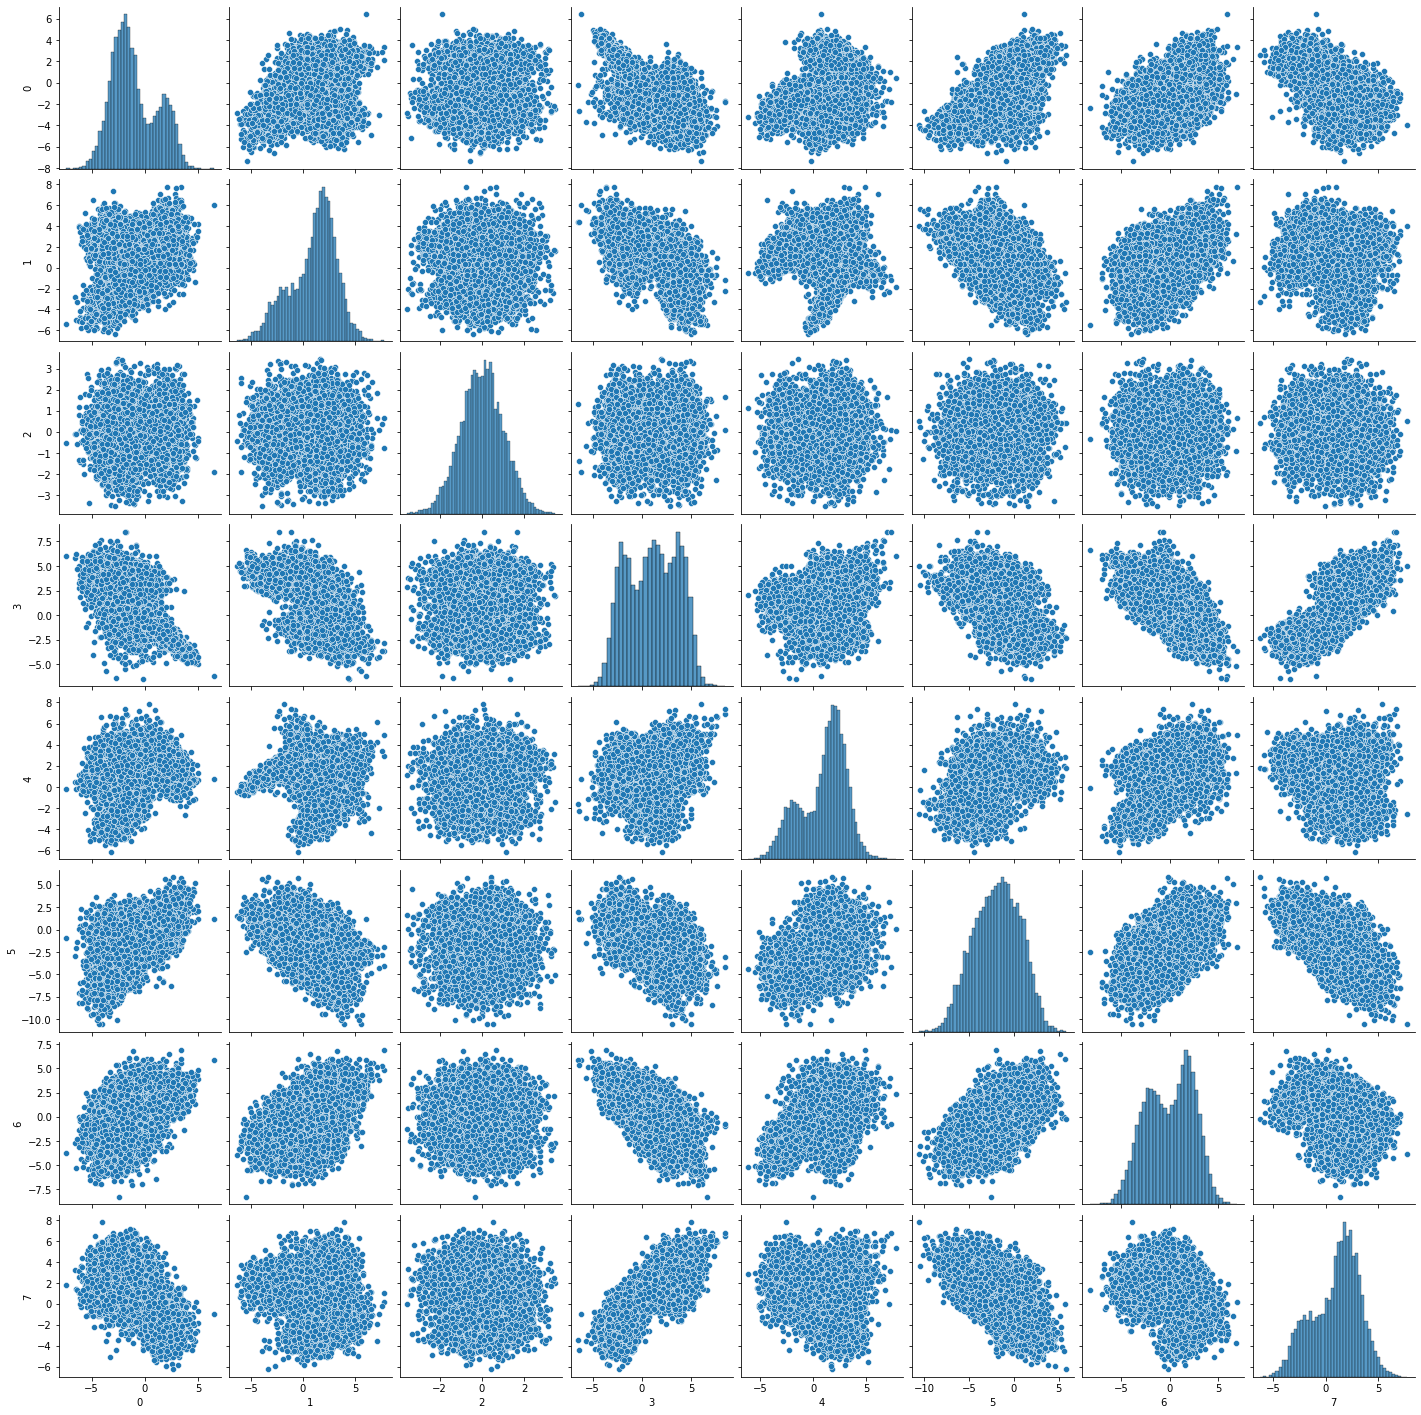

In [34]:
# Visualize data for each feature (pairplot,distplot).
sns.pairplot(df)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

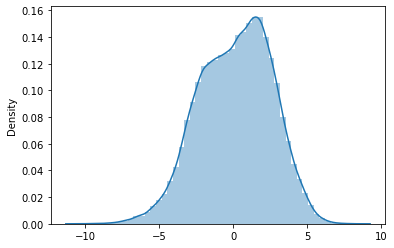

In [35]:
sns.distplot(df)

In [36]:
# Draw correlation matrix.
df.corr()

,0,1,2,3,4,5,6,7
0,1.000000,0.235306,0.019813,-0.705908,0.310024,0.635628,0.545522,-0.636540
1,0.235306,1.000000,-0.001988,-0.618075,-0.180396,-0.347091,0.469165,-0.129568
2,0.019813,-0.001988,1.000000,-0.010795,0.027022,0.023192,0.020194,-0.018107
3,-0.705908,-0.618075,-0.010795,1.000000,0.086099,-0.439463,-0.672497,0.758458
4,0.310024,-0.180396,0.027022,0.086099,1.000000,0.461343,0.465025,-0.176576
5,0.635628,-0.347091,0.023192,-0.439463,0.461343,1.000000,0.547131,-0.647011
6,0.545522,0.469165,0.020194,-0.672497,0.465025,0.547131,1.000000,-0.388518
7,-0.636540,-0.129568,-0.018107,0.758458,-0.176576,-0.647011,-0.388518,1.000000


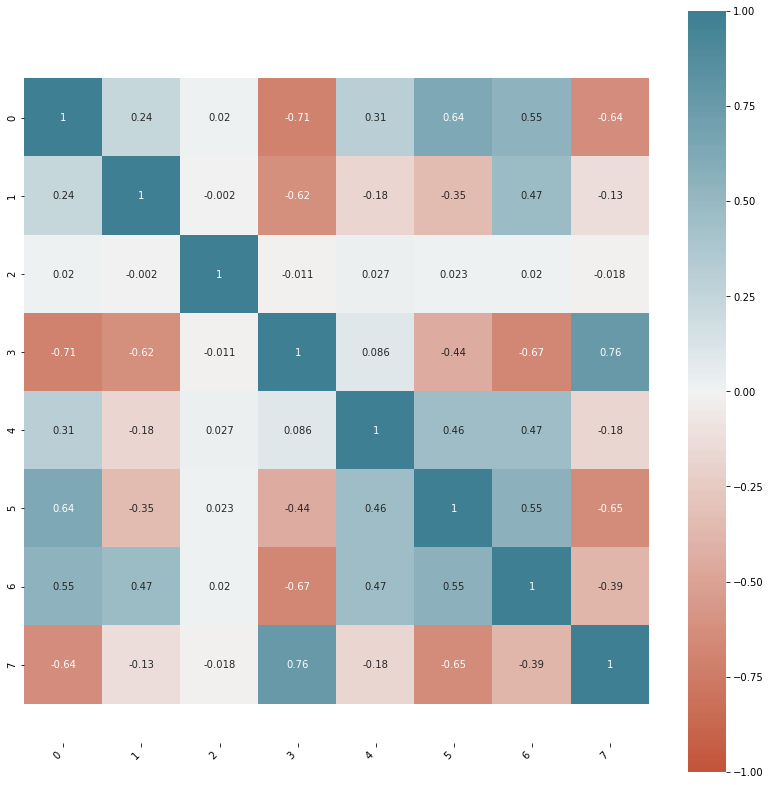

In [37]:
corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [38]:
# Handle outliers (you can use IsolationForest, Z-score, IQR)
z=np.abs(stats.zscore(df))
z

array([[0.24934109, 0.21155632, 1.54848575, ..., 0.53763097, 0.00566284,
        1.15220659],
       [1.21562472, 1.62265494, 0.52187207, ..., 0.03314851, 1.40338979,
        0.51777165],
       [0.78712613, 0.16242045, 0.25947611, ..., 0.12249416, 0.48387509,
        0.35998293],
       ...,
       [0.67334555, 1.4827283 , 0.52439513, ..., 0.50960652, 0.53475377,
        0.55105502],
       [0.08336999, 0.15830524, 0.83152777, ..., 1.11728642, 0.99626339,
        0.9651887 ],
       [0.66636667, 0.73903683, 0.68826729, ..., 1.01941697, 1.24352619,
        1.01322073]])

In [39]:
outliers = list(set(np.where(z > 3)[0]))

len(outliers)

58

Not: outliers ları tespit edebildim fakat silmeye çalıştığımda KeyError hatası aldım.

In [51]:
# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 102)

In [54]:
# Import Decision Tree, define different hyperparamters and tune the algorithm.
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9664285714285714
Accuracy of test: 0.961


In [92]:
# Visualize feature importances. ExecutableNotFound hatası alıyorum 

In [72]:
# Classification Report
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1528
           1       0.97      0.95      0.96      1472

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



In [73]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9612460623062303
Recall = 0.9608307961529706
Accuracy = 0.961
F1 Score = 0.9609715482586806


In [79]:
# Import XGBoostClassifier, define different hyperparamters and tune the algorithm.
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [80]:
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

[21:05:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [81]:
preds = model.predict(dmatrix_test)
preds[:10]

array([[0.0032666 , 0.9948297 , 0.00190373],
       [0.9920556 , 0.00525068, 0.00269368],
       [0.97285414, 0.0199777 , 0.00716821],
       [0.00557272, 0.9910703 , 0.00335702],
       [0.01551418, 0.980034  , 0.00445181],
       [0.00302349, 0.99495727, 0.00201928],
       [0.9574518 , 0.03771174, 0.0048364 ],
       [0.9850129 , 0.01102963, 0.00395755],
       [0.00184975, 0.99656373, 0.00158656],
       [0.00514192, 0.9914996 , 0.00335847]], dtype=float32)

In [83]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds 

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [84]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.973623692651916
Recall = 0.9737633024129296
Accuracy = 0.9736666666666667


In [ ]:
# Visualize feature importances. Bunu yapmaya çalışırken hata alıyorum.

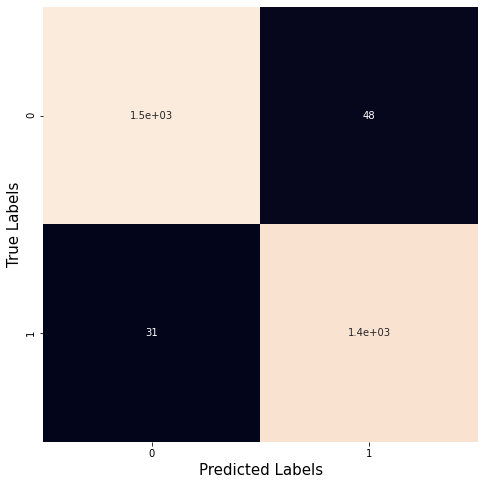

In [90]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [93]:
## Hyperparameter Tuning
#burda da hata aldım malesef
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBoostError: value 0 for Parameter num_class should be greater equal to 1
num_class: Number of output class in the multi-class classification.

In [ ]:
# Evaluate your result and select best performing algorithm for our case.